<a href="https://colab.research.google.com/github/MauricioRR-Tec/Sistemas-Inteligentes/blob/master/InferenciaBayesiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo y **Los Datos...**

Aplicar métodos bayesianos a un conjunto de datos de precios de billetes de un tren de alta velocidad español

In [ ]:
!pip install arviz
!pip install pymc3
!pip install Theano

     |████████████████████████████████| 1.5MB 5.4MB/s 
     |████████████████████████████████| 4.3MB 41.4MB/s 
     |████████████████████████████████| 727kB 46.2MB/s 
     |████████████████████████████████| 296kB 41.1MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1


In [ ]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/data/renfe_small.csv')
data = data.sample(frac=0.01, random_state=99)
data.shape

(258, 9)

In [ ]:
data.isnull().sum()/len(data)

insert_date    0.000000
origin         0.000000
destination    0.000000
start_date     0.000000
end_date       0.000000
train_type     0.000000
price          0.096899
train_class    0.000000
fare           0.000000
dtype: float64

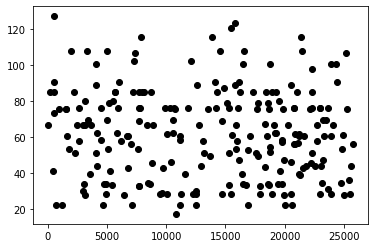

In [ ]:
plt.plot(data['price'], 'o', color='black')

El método plot_kde genera un gráfico de tipo estimación de densidad kernel ([KDE](https://medium.com/@garzonsergio/m%C3%A9todos-de-estimaci%C3%B3n-de-densidad-de-kernel-de-odf-a-ebsd-b4a143dc9eee))

([<matplotlib.axis.YTick at 0x7f8bcdcc4d30>],
 <a list of 1 Text major ticklabel objects>)

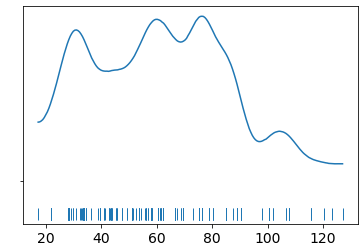

In [ ]:
az.plot_kde(data['price'].values, rug=True)
plt.yticks([0], alpha=0)        

Decido llenarlos con la media de los respectivos tipos de tarifas. También las otras dos columnas categóricas con los valores más comunes.


In [ ]:
data['train_class'] = data['train_class'].fillna(data['train_class'].mode().iloc[0])
data['fare'] = data['fare'].fillna(data['fare'].mode().iloc[0])
data['price'] = data.groupby('fare').transform(lambda x: x.fillna(x.mean()))

([<matplotlib.axis.YTick at 0x7f8bcdc97940>],
 <a list of 1 Text major ticklabel objects>)

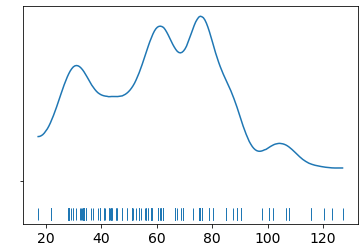

In [ ]:
az.plot_kde(data['price'].values, rug=True)
plt.yticks([0], alpha=0)

El gráfico de KDE del precio del billete de tren muestra una distribución similar a la de Gauss, a excepción de varias docenas de puntos de datos que están lejos de la media.

Supongamos que una distribución gaussiana es una descripción adecuada del precio del billete de tren. Como no conocemos la media o la desviación estándar, debemos establecer prioridades para ambos. Por tanto, un modelo razonable podría ser el siguiente.

## Modelo

Realizaremos inferencias gaussianas sobre los datos del precio del billete. Estas son algunas de las opciones de modelado que se incluyen en esto.

Conocimiento apriori:
Media de la población
Desviación estandar

Opciones para la función de probabilidad:
Las posibles proyecciones.

In [ ]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=0, upper=150)
    σ = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=μ, sd=σ, observed=data['price'].values)
    trace_g = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, μ]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1551.48it/s]


In [ ]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

     |████████████████████████████████| 1.4MB 4.7MB/s 
  Found existing installation: arviz 0.10.0
    Uninstalling arviz-0.10.0:
      Successfully uninstalled arviz-0.10.0


     |████████████████████████████████| 911kB 4.8MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


     |████████████████████████████████| 2.8MB 4.9MB/s 
  Created wheel for Theano: filename=Theano-1.0.4-cp36-none-any.whl size=2667178 sha256=4557be8159ad9aa6ff06dde3fa2fb70ccee9046d9a45ca43f861c1a0b2a0570d
  Stored in directory: /root/.cache/pip/wheels/88/fb/be/483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built Theano
  Found existing installation: Theano 1.0.5
    Uninstalling Theano-1.0.5:
      Successfully uninstalled Theano-1.0.5


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bbf8d7748>,
      dtype=object)

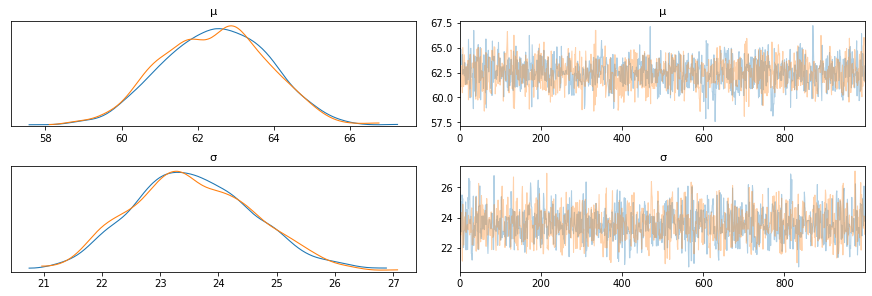

In [ ]:
az.plot_trace(trace_g)

A la izquierda, tenemos un gráfico de KDE: para cada valor de parámetro en el eje x, obtenemos una probabilidad en el eje y que nos dice qué tan probable es ese valor de parámetro.

A la derecha, obtenemos los valores muestreados individuales en cada paso durante el muestreo. A partir de la gráfica de trazas, podemos obtener visualmente los valores plausibles de la parte posterior.

El gráfico anterior tiene una fila para cada parámetro. Para este modelo, la parte posterior es bidimensional, por lo que la figura anterior muestra las distribuciones marginales de cada parámetro.

Hay un par de cosas a tener en cuenta aquí:

Nuestras cadenas de muestreo para los parámetros individuales (izquierda) parecen estar bien convergentes y estacionarias (no hay grandes desviaciones u otros patrones extraños).

La estimación posterior máxima de cada variable (el pico en las distribuciones del lado izquierdo) está muy cerca de los parámetros reales.

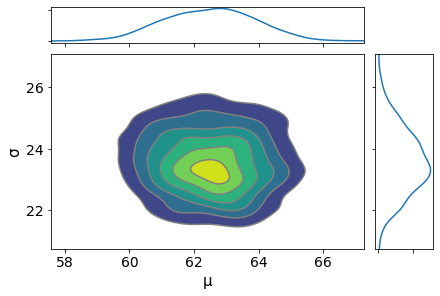

In [ ]:
az.plot_joint(trace_g, kind='kde', fill_last=False)

In [ ]:
az.summary(trace_g)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ,62.456,1.412,60.008,65.090,0.037,0.026,1461.0,1461.0,1460.0,1156.0,1.0
σ,23.572,1.058,21.821,25.698,0.027,0.019,1578.0,1567.0,1587.0,1529.0,1.0


También podemos ver el resumen anterior visualmente generando un gráfico [HDP](https://en.wikipedia.org/wiki/Credible_interval)




array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bce2b2080>,
      dtype=object)

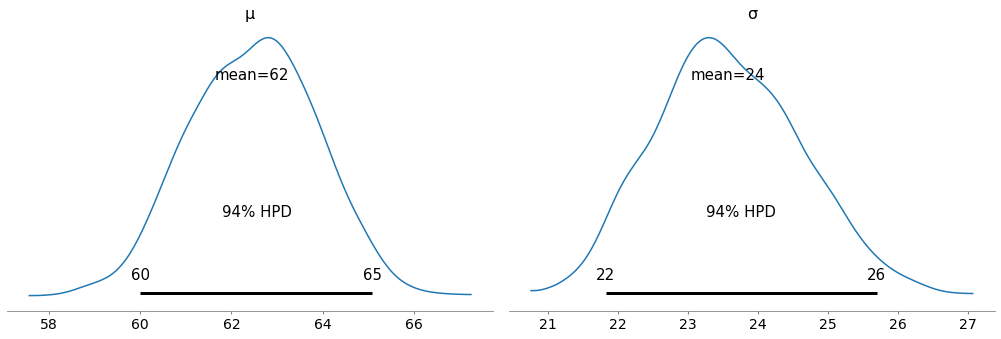

In [ ]:
az.plot_posterior(trace_g)

Aquí podemos interpretar como tal que hay un 94% de probabilidad de que la creencia esté entre 63,8 euros y 64,4 euros para el precio medio del billete.

Controles predictivos posteriores

Los controles predictivos posteriores (PPC) son una excelente manera de validar un modelo. La idea es generar datos a partir del modelo utilizando parámetros extraídos de la parte posterior.

Ahora que hemos calculado el posterior, vamos a ilustrar cómo usar los resultados de la simulación para derivar predicciones.

La siguiente función extraerá al azar 1000 muestras de parámetros de la traza. Luego, para cada muestra, extraerá 25798 números aleatorios de una distribución normal especificada por los valores de μ y σ en esa muestra.

In [ ]:
ppc = pm.sample_posterior_predictive(trace_g, samples=1000, model=model_g)

np.asarray(ppc['y']).shape

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [00:00<00:00, 1118.78it/s]


(1000, 258)

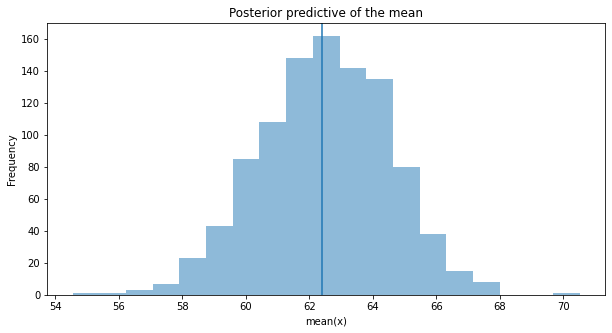

In [ ]:
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc['y']], bins=19, alpha=0.5)
ax.axvline(data.price.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [ ]:
import statsmodels.formula.api as smf
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_path = "https://raw.githubusercontent.com/rahulgutal4/Bitcoin-Price-Prediction-using-Bayesian-Regression/master/data/"

In [ ]:
# Reading the vectors from the given csv files
train1_90 = pd.read_csv(data_path+'/train1_90.csv')
train1_180 = pd.read_csv(data_path+'/train1_180.csv')
train1_360 = pd.read_csv(data_path+'/train1_360.csv')

In [ ]:
train2_90 = pd.read_csv(data_path+'/train2_90.csv')
train2_180 = pd.read_csv(data_path+'/train2_180.csv')
train2_360 = pd.read_csv(data_path+'/train2_360.csv')

In [ ]:
test_90 = pd.read_csv(data_path+'/test_90.csv')
test_180 = pd.read_csv(data_path+'/test_180.csv')
test_360 = pd.read_csv(data_path+'/test_360.csv')

In [ ]:
def measure(a, b):
	# calculating the mean and std deviation for a and b 
    meanOfA, meanOfB = np.mean(a), np.mean(b)
    stdOfA, stdOfB = np.std(a), np.std(b)
    n, result = len(a), 0
    for i in range(0,n):
        numer = ((meanOfA - a[i]) * (meanOfB - b[i]))
        denom = float(stdOfA * stdOfB * n)
        result += (numer/denom)
    return result

def computeDelta(wt, X, Xi):
    """
    This function computes equation 6 of the paper, but with the euclidean distance 
    replaced by the similarity function given in Equation 9.
    Parameters
    ----------
    wt : int
        This is the constant c at the top of the right column on page 4.
    X : A row of Panda Dataframe
        Corresponds to (x, y) in Equation 6.
    Xi : Panda Dataframe
        Corresponds to a dataframe of (xi, yi) in Equation 6.
    Returns
    -------
    float
        The output of equation 6, a prediction of the average price change.
    """

    numerator, denominator = 0, 0
    n = len(X) - 1
    matrx = Xi.to_numpy()
    for i in range(0,len(matrx)):
        numerator +=  (matrx[i][n] * math.exp(wt * measure(X[0:n], matrx[i][0:n])))
        denominator += math.exp(wt * measure(X[0:n], matrx[i][0:n]))
    E_emp = float(numerator)/denominator
    return E_emp

In [ ]:
# Perform the Bayesian Regression to predict the average price change for each dataset of train2 using train1 as input. 
# These will be used to estimate the coefficients (w0, w1, w2, and w3) in equation 8.
weight = 2  # This constant was not specified in the paper, but we will use 2.
trainDeltaP90 = np.empty(0)
trainDeltaP180 = np.empty(0)
trainDeltaP360 = np.empty(0)
for i in range(0,len(train1_90.index)) :
   trainDeltaP90 = np.append(trainDeltaP90, computeDelta(weight,train2_90.iloc[i],train1_90))
for i in range(0,len(train1_180.index)) :
   trainDeltaP180 = np.append(trainDeltaP180, computeDelta(weight,train2_180.iloc[i],train1_180))
for i in range(0,len(train1_360.index)) :
   trainDeltaP360 = np.append(trainDeltaP360, computeDelta(weight,train2_360.iloc[i],train1_360))


# Actual deltaP values for the train2 data.
trainDeltaP = np.asarray(train2_360[['Yi']])
trainDeltaP = np.reshape(trainDeltaP, -1)


# Combine all the training data
d = {'deltaP': trainDeltaP,
     'deltaP90': trainDeltaP90,
     'deltaP180': trainDeltaP180,
     'deltaP360': trainDeltaP360 }
trainData = pd.DataFrame(d)


# Feed the data: [deltaP, deltaP90, deltaP180, deltaP360] to train the linear model. 
# Use the statsmodels ols function.
# Use the variable name model for your fitted model
# YOUR CODE HERE
model = smf.ols(formula = 'deltaP ~ deltaP90 + deltaP180 + deltaP360', data = trainData).fit()
# Print the weights from the model
print(model.params)


# Perform the Bayesian Regression to predict the average price change for each dataset of test using train1 as input.
# This should be similar to above where it was computed for train2.
# YOUR CODE HERE
weight = 2 
testDeltaP90 = testDeltaP180 = testDeltaP360 = np.empty(0)
for i in range(0,len(train1_90.index)) :
  testDeltaP90 = np.append(testDeltaP90, computeDelta(weight,test_90.iloc[i],train1_90))
for i in range(0,len(train1_180.index)) :
  testDeltaP180 = np.append(testDeltaP180, computeDelta(weight,test_180.iloc[i],train1_180))
for i in range(0,len(train1_360.index)) :
  testDeltaP360 = np.append(testDeltaP360, computeDelta(weight,test_360.iloc[i],train1_360))

# Actual deltaP values for test data.
# YOUR CODE HERE (use the right variable names so the below code works)
testDeltaP = np.asarray(test_360[['Yi']])
testDeltaP = np.reshape(testDeltaP, -1)


# Combine all the test data
d = {'deltaP': testDeltaP,
     'deltaP90': testDeltaP90,
     'deltaP180': testDeltaP180,
     'deltaP360': testDeltaP360}
testData = pd.DataFrame(d)


# Predict price variation on the test data set.
result = model.predict(testData)
compare = { 'Actual': testDeltaP,
            'Predicted': result }
compareDF = pd.DataFrame(compare)


# Compute the MSE and print the result
# HINT: consider using the sm.mean_squared_error function
MSE = 0.0
# YOUR CODE HERE
MSE = sm.mean_squared_error(compareDF['Actual'],compareDF['Predicted'])
print("The MSE is %f" % (MSE))

Intercept    -0.307294
deltaP90     14.254037
deltaP180   -25.938119
deltaP360    13.255519
dtype: float64
The MSE is 0.953199
